# Lista 7
## Jakub Ciągło 275986 

___
# Importy

In [13]:
import numpy as np
import matplotlib.pyplot as plt

___
# Metody, które zostaną użyte w zadaniach:

### Metoda Eulera
Funkcja `euler` implementuje metodę Eulera do numerycznego rozwiązania równań różniczkowych. Na początku tworzy tablicę `y`, w której będą przechowywane kolejne wartości obliczane na podstawie danych punktów czasowych `t`. Najpierw zapisuje początkową wartość `y0` dla pierwszego elementu tablicy. Następnie w pętli oblicza kolejne wartości `y` na podstawie wartości poprzedniej oraz wartości funkcji `f` w danym punkcie czasowym. Różnica czasowa pomiędzy kolejnymi krokami jest określona przez różnicę pomiędzy `t[i+1]` a `t[i]`.

In [14]:
def euler(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t) - 1):
        y[i + 1] = y[i] + f(y[i], t[i]) * (t[i + 1] - t[i])
    return y

### Metoda Rungego-Kutty 2 rzędu
Funkcja `rk2` realizuje metodę Rungego-Kutty drugiego rzędu (RK2) do rozwiązania równań różniczkowych. Przyjmuje funkcję `f`, początkową wartość `y0` oraz zbiór punktów czasowych `t`. Najpierw tworzy tablicę `y`, w której przechowuje kolejne wyniki obliczeń. Pierwszy element zapisuje jako `y0`. Następnie, w pętli oblicza kolejne wartości `y` korzystając z dwóch kroków obliczeń – `k1` i `k2`, które są wynikiem funkcji `f` w różnych punktach czasowych i wartości funkcji `y`. Różnica czasowa między krokami jest równa `t[i+1] - t[i]`.

In [15]:
def rk2(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i + 1] - t[i]
        k1 = h * f(y[i], t[i])
        k2 = h * f(y[i] + k1 / 2, t[i] + h / 2)
        y[i + 1] = y[i] + k2
    return y

### Metoda Rungego-Kutty 4 rzędu
Funkcja `rk4` implementuje metodę Rungego-Kutty czwartego rzędu (RK4) do rozwiązania równań różniczkowych. Przyjmuje funkcję `f`, początkową wartość `y0` oraz zbiór punktów czasowych `t`. Tworzy tablicę `y`, w której przechowuje wyniki obliczeń. Pierwszy element zapisuje jako `y0`. W pętli oblicza kolejne wartości `y` korzystając z czterech kroków: `F1`, `F2`, `F3` oraz `F4`, które są wynikiem funkcji `f` w różnych punktach czasowych i wartościach funkcji `y`. Każdy krok obliczeniowy korzysta z wartości poprzednich i różnicy czasowej `t[i+1] - t[i]`. Wynik obliczeń `y[i+1]` jest sumą poprzedniej wartości `y[i]` oraz 1/6-krotną sumą `F1`, `2*F2`, `2*F3` i `F4`.

In [16]:
def rk4(f, y0, t):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(0, len(t) - 1):
        h = t[i + 1] - t[i]
        F1 = h * f(y[i], t[i])
        F2 = h * f(y[i] + F1 / 2, t[i] + h / 2)
        F3 = h * f(y[i] + F2 / 2, t[i] + h / 2)
        F4 = h * f(y[i] + F3, t[i] + h)
        y[i + 1] = y[i] + 1 / 6 * (F1 + 2 * F2 + 2 * F3 + F4)
    return y

___
# Zadanie 1
W zadaniu została napisana funkcja reprezentująca zadane równanie różniczkowe oraz funkcja zwracająca rozwiązanie analityczne. Następnie zostaje rozwiązane podane równanie różniczkowe metodą Eulera oraz RK2 i RK4 dla różnych liczby kroków.

Rozwiązanie analityczne: 0.8869291730697463 
Euler (1 krok): 0.88 
Euler (2 kroki): 0.883603375 
Euler (4 kroki): 0.8852986406921876 
RK2 (1 krok): 0.88720675 
RK2 (2 kroki): 0.8869955271437501 
RK2 (4 kroki): 0.8869453945835604 
RK4 (1 krok): 0.8869293781 
RK4 (2 kroki): 0.8869291852678767 
RK4 (4 kroki): 0.8869291738135916


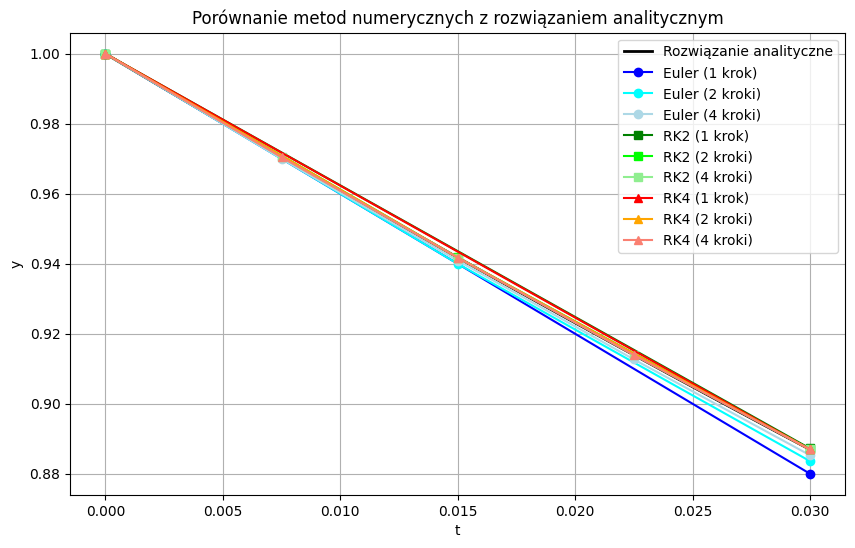

In [29]:
def rownanie(y, t):
    return -4 * y + t**2

def analitycal(t):
    return  (31 / 32) * np.exp(-4 * t) + (1 / 4) * t**2 - (1 / 8) * t + (1 / 32)

y0 = 1
t1 = np.linspace(0, 0.03, 2)  
t2 = np.linspace(0, 0.03, 3) 
t4 = np.linspace(0, 0.03, 5)

t = np.linspace(0, 0.03, 1000)
analitycal_soultion = analitycal(0.03)

euler_1 = euler(rownanie, y0, t1)
euler_2 = euler(rownanie, y0, t2)
euler_4 = euler(rownanie, y0, t4)

rk2_1 = rk2(rownanie, y0, t1)
rk2_2 = rk2(rownanie, y0, t2)
rk2_4 = rk2(rownanie, y0, t4)

rk4_1 = rk4(rownanie, y0, t1)
rk4_2 = rk4(rownanie, y0, t2)
rk4_4 = rk4(rownanie, y0, t4)

print('Rozwiązanie analityczne:', analitycal_soultion,
      '\nEuler (1 krok):', euler_1[-1], '\nEuler (2 kroki):', euler_2[-1], '\nEuler (4 kroki):', euler_4[-1], 
      '\nRK2 (1 krok):', rk2_1[-1], '\nRK2 (2 kroki):', rk2_2[-1], '\nRK2 (4 kroki):', rk2_4[-1], 
      '\nRK4 (1 krok):', rk4_1[-1], '\nRK4 (2 kroki):', rk4_2[-1], '\nRK4 (4 kroki):', rk4_4[-1])

plt.figure(figsize=(10, 6))

t = np.linspace(0, 0.03, 1000)
plt.plot(t, analitycal(t), label='Rozwiązanie analityczne', color='black', linewidth=2)

plt.plot(t1, euler_1, 'o-', label='Euler (1 krok)', color='blue')
plt.plot(t2, euler_2, 'o-', label='Euler (2 kroki)', color='cyan')
plt.plot(t4, euler_4, 'o-', label='Euler (4 kroki)', color='lightblue')


plt.plot(t1, rk2_1, 's-', label='RK2 (1 krok)', color='green')
plt.plot(t2, rk2_2, 's-', label='RK2 (2 kroki)', color='lime')
plt.plot(t4, rk2_4, 's-', label='RK2 (4 kroki)', color='lightgreen')


plt.plot(t1, rk4_1, '^-', label='RK4 (1 krok)', color='red')
plt.plot(t2, rk4_2, '^-', label='RK4 (2 kroki)', color='orange')
plt.plot(t4, rk4_4, '^-', label='RK4 (4 kroki)', color='salmon')


plt.xlabel('t')
plt.ylabel('y')
plt.title('Porównanie metod numerycznych z rozwiązaniem analitycznym')
plt.legend()
plt.grid(True)
plt.show()

Możemy zauważyć, że wyniki stopniowo zbliżają się do rozwiązania analitycznego, a RK4 daje najbardziej precyzyjne rozwiązania już przy mniejszych krokach.

___
# Zadanie 2
W zadaniu porównane zostają wyniki metody Eulera i RK4 dla równań różniczkowego $y' = \sin(y)$ . Na wykresie pokazane są wartości obliczonego rozwiązania za pomocą tych dwóch metod w zależności od czasu $t$.

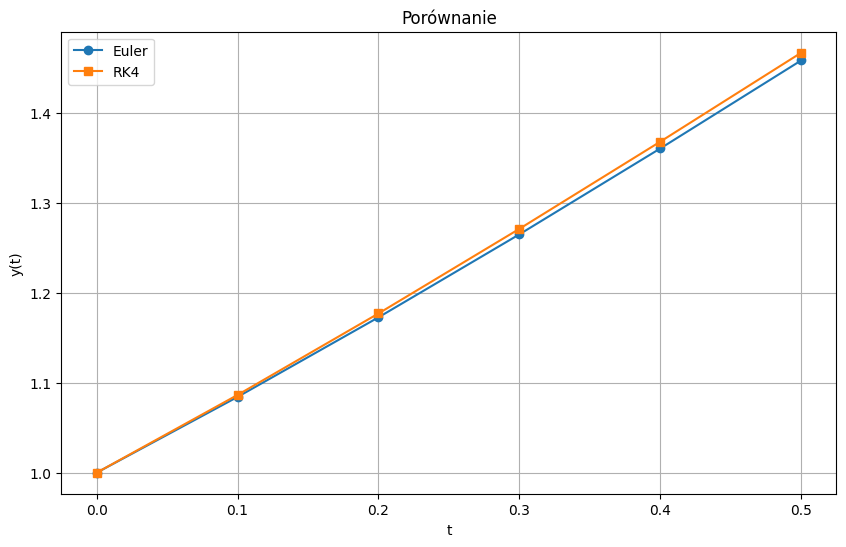

In [30]:
def rownanie(y, t):
    return np.sin(y)

y0 = 1
h = 0.1
t = np.arange(0, 0.5 + h, h)

y_euler = euler(rownanie, y0, t)
y_rk4 = rk4(rownanie, y0, t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_euler, 'o-', label='Euler')
plt.plot(t, y_rk4, 's-', label='RK4')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Porównanie')
plt.legend()
plt.grid()
plt.show()

Analizując wykres możemy dojść do wniosku, że metody Eulera i RK4 różnią się dokładnością. Wiemy jednak, że RK4 zapewnia bardziej precyzyjne rozwiązania.

___
# Zadanie 3
Zadanie rozpoczynamy od modyfikacji zaimplementowanej metody RK4, aby mogła ona obsługiwać równania różniczkowe n-tego rzędu.

In [19]:
def rk4_n(f, y0, t):
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    
    for i in range(len(t) - 1):
        h = t[i + 1] - t[i]
        F1 = h * f(y[i], t[i])
        F2 = h * f(y[i] + F1 / 2, t[i] + h / 2)
        F3 = h * f(y[i] + F2 / 2, t[i] + h / 2)
        F4 = h * f(y[i] + F3, t[i] + h)
        y[i + 1] = y[i] + 1 / 6 * (F1 + 2 * F2 + 2 * F3 + F4)

    return y

Funkcja `wahadlo` oblicza ruch wahadła metodą RK4 dla trzech podanych przypadków,. Funkcja `f(y, t)`, reprezentująca podane równanie różniczkowe, oblicza zmiany wektora stanu w czasie, gdzie `dtheta_dt` to prędkość kątowa, a `dv_dt` to przyspieszenie kątowe z uwzględnieniem tarcia i siły zewnętrznej.

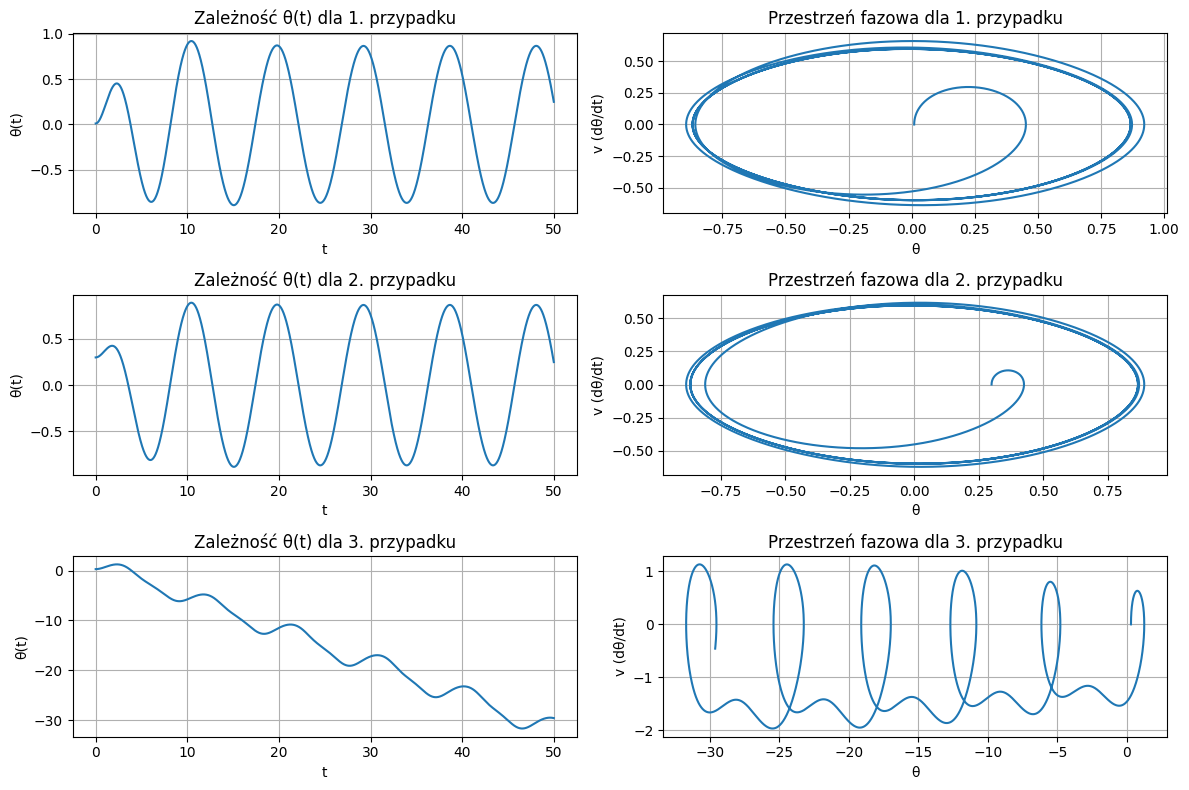

In [20]:
def wahadlo(Q, omega_hat, A_hat, theta0, v0, t_max, h):
    def f(y, t):
        theta, v = y
        dtheta_dt = v
        dv_dt = - (1 / Q) * v - np.sin(theta) + A_hat * np.cos(omega_hat * t)
        return np.array([dtheta_dt, dv_dt])
    
    t = np.arange(0, t_max, h)
    y = rk4_n(f, [theta0, v0], t)
    return t, y

przypadki = [
    {'Q': 2, 'omega_hat': 2 / 3, 'A_hat': 0.5, 'v0': 0, 'theta0': 0.01},
    {'Q': 2, 'omega_hat': 2 / 3, 'A_hat': 0.5, 'v0': 0, 'theta0': 0.3},
    {'Q': 2, 'omega_hat': 2 / 3, 'A_hat': 1.35, 'v0': 0, 'theta0': 0.3},
]

t_max = 50  
h = 0.01   

plt.figure(figsize=(12, 8))
for i, case in enumerate(przypadki, 1):
    Q, omega_hat, A_hat, v0, theta0 = case.values()
    t, y = wahadlo(Q, omega_hat, A_hat, theta0, v0, t_max, h)

    plt.subplot(3, 2, 2 * i - 1)
    plt.plot(t, y[:, 0])
    plt.xlabel('t')
    plt.ylabel('θ(t)')
    plt.title(f'Zależność θ(t) dla {i}. przypadku')
    plt.grid()

    plt.subplot(3, 2, 2 * i)
    plt.plot(y[:, 0], y[:, 1])
    plt.xlabel('θ')
    plt.ylabel('v (dθ/dt)')
    plt.title(f'Przestrzeń fazowa dla {i}. przypadku')
    plt.grid()

plt.tight_layout()
plt.show()


___ 
# Zadanie 4

Zadanie rozpoczęto od modyfikacji metody RK4, aby pasowała do analizy dla różnych kątów wyrzutu.

In [21]:
def rk4_n_a(f, y0, t,  A=None):
    y = np.zeros((len(t), len(y0)))
    y[0, :] = y0
    for i in range(len(t) - 1):
        h = t[i + 1] - t[i]
        if A is None:
            k1 = h * f(t[i], y[i, :])
            k2 = h * f(t[i] + h / 2, y[i, :] + k1 / 2)
            k3 = h * f(t[i] + h / 2, y[i, :] + k2 / 2)
            k4 = h * f(t[i] + h, y[i, :] + k3)
        else:
            k1 = h * f(t[i], y[i, :], A)
            k2 = h * f(t[i] + h / 2, y[i, :] + k1 / 2, A)
            k3 = h * f(t[i] + h / 2, y[i, :] + k2 / 2, A)
            k4 = h * f(t[i] + h, y[i, :] + k3, A)
        y[i + 1, :] = y[i, :] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

Kod symuluje rzuty pod różnymi kątami i prędkościami początkowymi, z uwzględnieniem oporu powietrza i bez niego. Parametry oporu zależą od współczynnika aerodynamicznego `cw`, gęstości powietrza `rho`, masy obiektu `m` oraz powierzchni przekroju `A`. 

Funkcja `air_resistance` oblicza siłę oporu działającą na obiekt na podstawie jego prędkości i powierzchni. Funkcja `equations_no_drag` definiuje równania ruchu w przypadku braku oporu, uwzględniając jedynie przyspieszenie grawitacyjne. Funkcja `equations_with_drag` rozszerza te równania o wpływ siły oporu powietrza, która redukuje przyspieszenie zarówno w kierunku poziomym, jak i pionowym.

Funkcja `simulate_throw` inicjalizuje warunki początkowe dla rzutu, przelicza kąt na radiany i rozkłada prędkość początkową na składowe poziome i pionowe. Następnie, za pomocą metody RK4, symuluje trajektorię, zależnie od tego, czy opór powietrza jest uwzględniony (poprzez przekazanie odpowiednich równań ruchu).

Funkcja `filter_trajectory` odfiltrowuje punkty trajektorii, aby uwzględnić tylko te, które znajdują się powyżej poziomu gruntu.

Kod generuje wykresy dla różnych kombinacji kątów, powierzchni i prędkości początkowych. Każda symulacja przedstawia trajektorie dla ruchu bez oporu i z oporem powietrza. Wykresy pokazują wpływ oporu na zasięg i wysokość lotu, które zmniejszają się wraz ze wzrostem powierzchni przekroju obiektu lub prędkości początkowej.

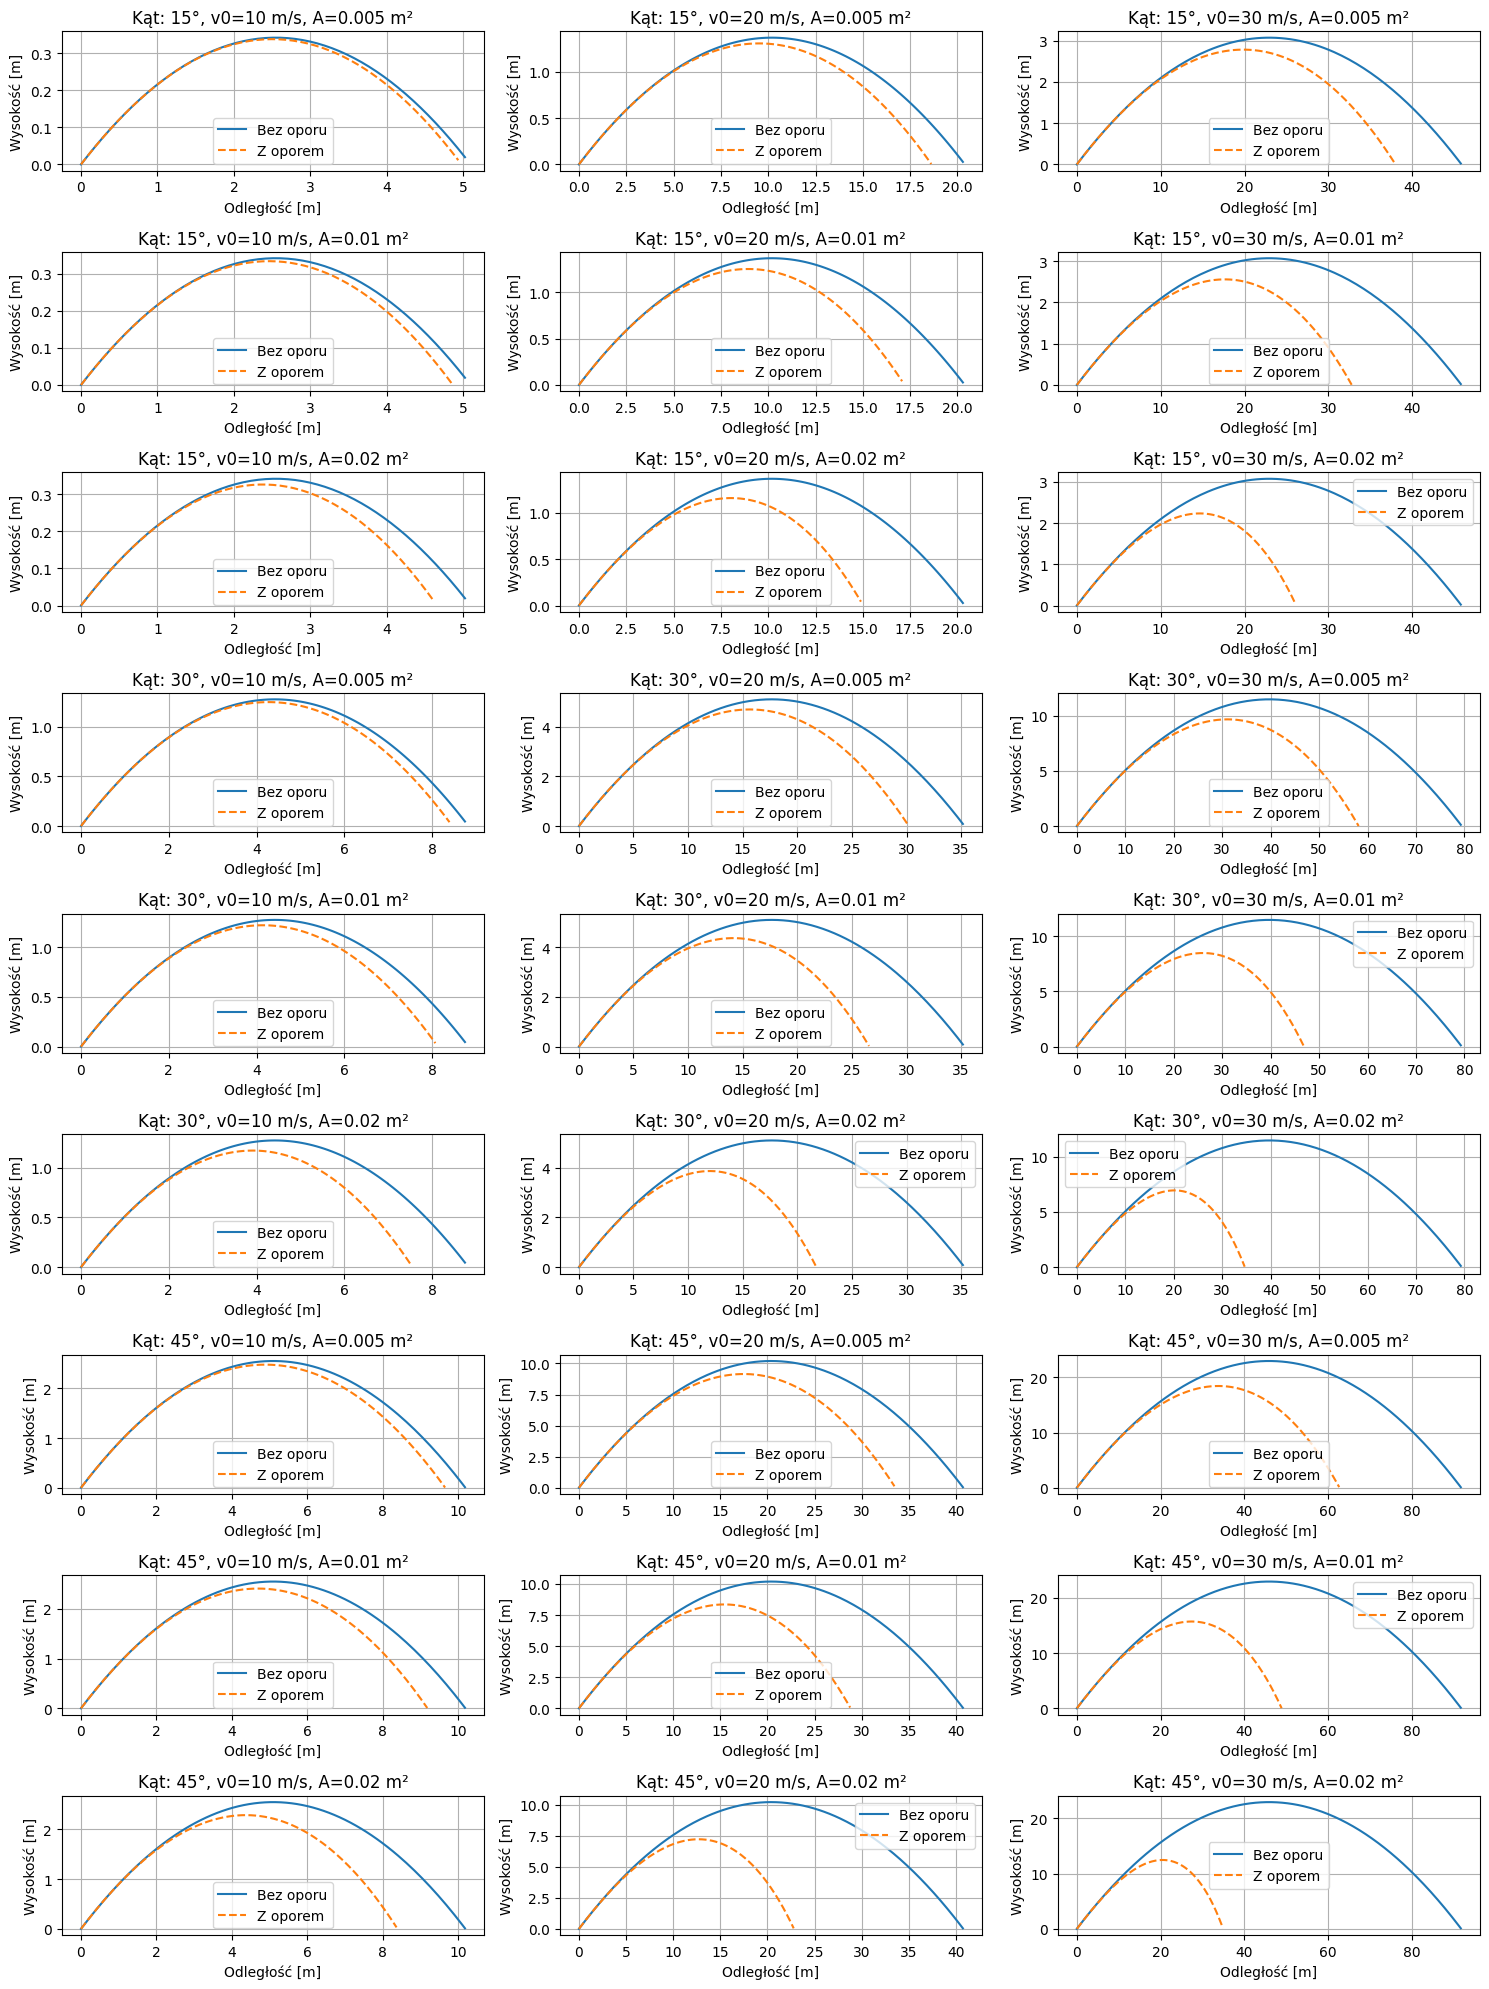

In [22]:
g = 9.81  
cw = 0.35  
rho = 1.2  
m = 0.15   

def air_resistance(v, A):
    return 0.5 * cw * rho * A * np.linalg.norm(v) * v

def equations_no_drag(t, y):
    x, vx, y_pos, vy = y
    ax = 0
    ay = -g
    return np.array([vx, ax, vy, ay])

def equations_with_drag(t, y, A):
    x, vx, y_pos, vy = y
    v = np.array([vx, vy])
    F_drag = air_resistance(v, A) / m
    ax = -F_drag[0]
    ay = -g - F_drag[1]
    return np.array([vx, ax, vy, ay])

def simulate_throw(v0, angle, t_max, h, A):
    angle_rad = np.radians(angle)
    vx0 = v0 * np.cos(angle_rad)
    vy0 = v0 * np.sin(angle_rad)
    y0 = [0, vx0, 0, vy0] 
    t = np.arange(0, t_max, h)
    if A is None:
        y = rk4_n_a(equations_no_drag, y0, t)
    else:
        y = rk4_n_a(equations_with_drag, y0, t, A=A)
    return t, y

def filter_trajectory(y):
    mask = y[:, 2] >= 0
    return y[mask]

angles = [15, 30, 45]
t_max = 5
h = 0.01
areas = [0.005, 0.01, 0.02] 
velocities = [10, 20, 30] 

plt.figure(figsize=(15, 20))

plot_index = 1
for angle in angles:
    for i, A in enumerate(areas, 1):
        for j, v0 in enumerate(velocities, 1):

            t, y_no_drag = simulate_throw(v0, angle, t_max, h, A=None)
            y_no_drag = filter_trajectory(y_no_drag)
            plt.subplot(len(angles) * len(areas), len(velocities), plot_index)
            plt.plot(y_no_drag[:, 0], y_no_drag[:, 2], label='Bez oporu')

            t, y_with_drag = simulate_throw(v0, angle, t_max, h, A=A)
            y_with_drag = filter_trajectory(y_with_drag)
            plt.plot(y_with_drag[:, 0], y_with_drag[:, 2], '--', label='Z oporem')

            plt.title(f'Kąt: {angle}°, v0={v0} m/s, A={A} m²')
            plt.xlabel('Odległość [m]')
            plt.ylabel('Wysokość [m]')
            plt.legend()
            plt.grid()
            plot_index += 1

plt.tight_layout()
plt.show()

___
# Zadanie 5
Kod implementuje metodę strzelania do rozwiązania zagadnienia brzegowego dla równania różniczkowego drugiego rzędu, przy użyciu metody `RK4`.
Funkcja `f(x, y)` opisuje równanie różniczkowe w postaci układu równań pierwszego rzędu, w którym wartość `y[1]` reprezentuje pochodną funkcji `y[0]`.
Funkcja `shooting_method` próbuje znaleźć warunek początkowy dla pochodnej `y'(x_min)` (przekazany jako `guess`), który spełnia brzegowe warunki na `y(x_max)`.
Wynik ukazuje kształt funkcji na przedziale `x_range`, z poprawnym dostosowaniem warunków początkowych dzięki metodzie strzelania.

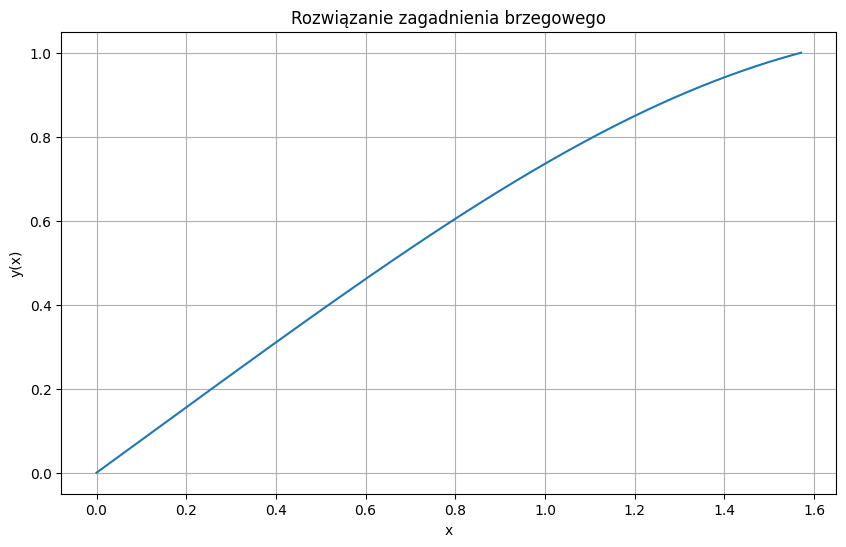

In [32]:
def f(y, x):
    return np.array([y[1], -(1 - 0.2 * x) * y[0]**2])

def shooting_method(f, x_range, y0, target_y, guess, add = 1e-4, n_steps=1000, tolerance=1e-6, max_iter=1000):
    x_min, x_max = x_range
    t = np.linspace(x_min, x_max, n_steps + 1)
    for _ in range(max_iter):
        y0[1] = guess
        y_vals = rk4_n(f, y0, t)  
        error = y_vals[-1, 0] - target_y 

        if abs(error) < tolerance:
            return t, y_vals

        y0_temp = y0.copy()
        y0_temp[1] = guess + add
        y_vals_temp = rk4_n(f, y0_temp, t)
        derivative = (y_vals_temp[-1, 0] - y_vals[-1, 0]) / add

        guess -= error / derivative

    raise ValueError('Nie znaleziono rozwiązania w zadanej liczbie iteracji.')

x_range = (0, np.pi / 2)
y0 = [0, 0]  
target_y = 1 
initial_guess = 2 

x_vals, y_vals = shooting_method(f, x_range, y0, target_y, initial_guess)
plt.figure(figsize=(10,6))
plt.plot(x_vals, y_vals[:, 0])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Rozwiązanie zagadnienia brzegowego')
plt.grid()
plt.show()
